

```
`# This is formatted as code`
```

## 2020.03.10 DACON 온도 추정 경진대회

### EDA 01 by David Song

Y00 ~ Y18 살펴보기


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
print(os.getcwd())

/content


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv("./gdrive/My Drive/Colab Notebooks/2020_1_data/02.dacon_temp/data/train.csv")
test = pd.read_csv("./gdrive/My Drive/Colab Notebooks/2020_1_data/02.dacon_temp/data/test.csv")

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 60 columns):
id     4752 non-null int64
X00    4752 non-null float64
X01    4752 non-null float64
X02    4752 non-null float64
X03    4752 non-null float64
X04    4752 non-null float64
X05    4752 non-null float64
X06    4752 non-null float64
X07    4752 non-null float64
X08    4752 non-null float64
X09    4752 non-null float64
X10    4752 non-null float64
X11    4752 non-null float64
X12    4752 non-null float64
X13    4752 non-null float64
X14    4752 non-null float64
X15    4752 non-null float64
X16    4752 non-null float64
X17    4752 non-null float64
X18    4752 non-null float64
X19    4752 non-null float64
X20    4752 non-null float64
X21    4752 non-null float64
X22    4752 non-null float64
X23    4752 non-null float64
X24    4752 non-null float64
X25    4752 non-null float64
X26    4752 non-null float64
X27    4752 non-null float64
X28    4752 non-null float64
X29    4752 non-null floa

- train.csv: 30일간의 기상청데이터(X00 ~ X39) 및 센서데이터(Y00 ~ Y17) + 이후 3일 간의 기상청 데이터(X00 ~ X39) 및 센서데이터(Y18) <br>
- test.csv: 기간 이후 80일 간의 기상청 데이터(X00 ~ X39)


In [0]:
value = ['Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17','Y18']
train[value].head()

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


- Y18:NaN -> Y00 ~ Y17: not null <br>
- Y00 ~ Y17: NaN -> Y18: not null <br>

In [0]:
# when 'Y18' column has a null value
temp_null = train[train['Y18'].isnull()]
temp_null.head()

,id,X00,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,9.7,988.8,1.2,0.6,0.0,1009.3,989.6,12.2,1009.9,1009.8,0.0,0.0,82.4,71.3,0.0,101.1,0.0,56.1,0.3,0.0,91.0,0.0,1002.5,1009.8,1.1,2.3,0.5,1008.7,12.3,1001.6,69.1,8.2,10.7,1010.1,0.0,256.4,0.0,77.2,62.6,0.0,12.5,11.5,11.0,20.0,20.0,10.5,10.0,10.5,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0,NaN
1,1,9.3,988.9,1.7,1.9,0.0,1009.3,989.6,12.1,1010.0,1009.9,0.0,0.0,81.2,121.8,0.0,165.3,0.0,0.0,0.4,0.0,91.9,0.0,1002.5,1009.9,0.0,0.0,0.0,1008.7,12.1,1001.7,70.3,8.3,10.3,1010.1,0.0,215.4,0.0,77.3,63.5,0.0,12.5,11.0,11.0,20.0,20.0,10.0,9.5,10.0,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0,NaN
2,2,9.4,989.0,1.1,2.3,0.0,1009.2,989.7,12.1,1010.1,1010.1,0.0,0.0,86.1,232.0,0.0,144.0,0.0,0.0,0.6,0.0,93.3,0.0,1002.4,1009.8,0.0,0.0,0.0,1008.6,12.1,1001.6,71.5,8.0,9.7,1010.0,0.0,235.2,0.0,77.3,63.9,0.0,12.0,11.0,11.0,19.5,19.5,10.0,9.0,10.0,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5,NaN
3,3,9.4,988.9,1.5,0.7,0.0,1009.2,989.6,12.0,1010.0,1010.0,0.0,0.0,87.7,0.0,0.0,115.9,0.0,294.1,0.1,0.0,93.4,0.0,1002.4,1009.7,0.0,0.0,0.2,1008.7,12.1,1001.5,73.2,7.7,9.4,1010.1,0.0,214.0,0.0,77.5,64.5,0.0,12.0,11.0,11.0,19.5,19.5,9.5,9.0,9.5,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5,NaN
4,4,9.2,988.9,0.8,1.7,0.0,1009.2,989.7,12.0,1010.1,1010.0,0.0,0.0,88.9,0.0,0.0,124.7,0.0,0.0,0.0,0.0,94.1,0.0,1002.4,1009.7,0.0,0.0,0.0,1008.7,12.0,1001.5,74.3,7.4,9.4,1010.1,0.0,174.9,0.0,78.0,65.0,0.0,12.0,10.5,10.5,19.0,19.5,9.5,8.5,9.5,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5,NaN


In [0]:
print(temp_null.iloc[:,-19:-1].isnull().any())

Y00    False
Y01    False
Y02    False
Y03    False
Y04    False
Y05    False
Y06    False
Y07    False
Y08    False
Y09    False
Y10    False
Y11    False
Y12    False
Y13    False
Y14    False
Y15    False
Y16    False
Y17    False
dtype: bool


In [0]:
# when 'Y00 ~ Y17' columns have null values
temp_null = train[~train['Y18'].isnull()]
print(temp_null.iloc[:,-19:-1].isnull().any())

Y00    True
Y01    True
Y02    True
Y03    True
Y04    True
Y05    True
Y06    True
Y07    True
Y08    True
Y09    True
Y10    True
Y11    True
Y12    True
Y13    True
Y14    True
Y15    True
Y16    True
Y17    True
dtype: bool


### 실제 예측해야 하는 값은 Y18이다.
따라서 Y00 ~ Y17 과 Y18 사이의 관계에 대해 정의해야 한다.

### Y18: not null data

In [0]:
y18 = train[~train['Y18'].isnull()]['Y18']
# reset the index
y18 = y18.reset_index(drop=True)
print(y18)

0      20.5
1      20.5
2      20.5
3      20.5
4      20.5
       ... 
427    21.5
428    21.5
429    21.5
430    21.5
431    21.0
Name: Y18, Length: 432, dtype: float64


In [0]:
no_y18_column = ['Y00','Y01','Y02','Y03','Y04','Y05','Y06','Y07','Y08','Y09','Y10','Y11','Y12','Y13','Y14','Y15','Y16','Y17']
no_y18 = train[train['Y18'].isnull()][no_y18_column]
no_y18 = no_y18[3888:].reset_index(drop=True)
print(no_y18)

      Y00   Y01   Y02   Y03   Y04   Y05  ...   Y12   Y13   Y14   Y15   Y16   Y17
0    20.5  20.5  20.5  25.5  25.5  19.5  ...  18.5  18.0  17.5  17.0  18.5  17.0
1    20.0  20.5  20.5  25.5  25.5  19.5  ...  18.5  17.5  17.5  17.0  18.0  17.0
2    20.0  20.0  20.5  25.5  25.5  19.5  ...  18.5  17.5  17.5  17.0  18.0  17.0
3    20.0  20.0  20.0  25.5  25.0  19.5  ...  18.5  17.0  17.0  17.0  18.0  16.5
4    19.5  20.0  20.0  25.0  25.0  19.5  ...  18.0  17.0  17.0  17.0  18.0  16.5
..    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
427  22.0  22.5  22.5  26.0  26.0  21.0  ...  20.5  20.5  20.0  20.0  20.5  20.0
428  22.0  22.5  22.5  26.0  25.5  21.0  ...  20.5  20.5  20.0  19.5  20.5  19.5
429  21.5  22.5  22.5  26.0  25.5  21.0  ...  20.0  20.0  19.5  19.5  20.0  19.0
430  21.5  22.0  22.0  25.5  25.5  20.5  ...  20.0  20.0  19.5  19.5  20.0  19.0
431  21.5  22.0  22.0  25.5  25.5  20.5  ...  19.5  19.5  19.5  19.5  19.5  19.0

[432 rows x 18 columns]


데이터 합치기

In [0]:
target = pd.concat([no_y18, y18], axis = 1)
target

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,20.5,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.5,18.5,17.5,18.5,18.0,17.5,17.0,18.5,17.0,20.5
1,20.0,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.0,18.0,17.5,18.5,17.5,17.5,17.0,18.0,17.0,20.5
2,20.0,20.0,20.5,25.5,25.5,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.5,17.5,17.0,18.0,17.0,20.5
3,20.0,20.0,20.0,25.5,25.0,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.0,17.0,17.0,18.0,16.5,20.5
4,19.5,20.0,20.0,25.0,25.0,19.5,18.0,18.5,19.0,17.0,17.5,17.0,18.0,17.0,17.0,17.0,18.0,16.5,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,22.0,22.5,22.5,26.0,26.0,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,20.0,20.5,20.0,21.5
428,22.0,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,19.5,20.5,19.5,21.5
429,21.5,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.0,20.0,19.5,19.5,20.0,19.0,21.5
430,21.5,22.0,22.0,25.5,25.5,20.5,20.0,20.0,20.0,19.5,20.0,18.5,20.0,20.0,19.5,19.5,20.0,19.0,21.5


In [0]:
상관관계 보여주기

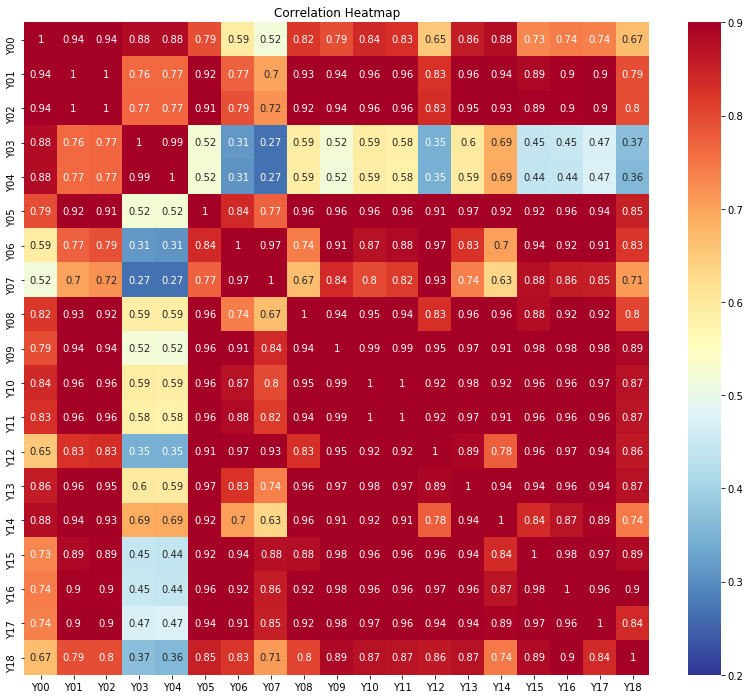

In [0]:
correl = target.corr()
plt.figure(figsize = (14,12))

# Heatmap of correlations
sns.heatmap(correl, cmap = plt.cm.RdYlBu_r, vmin = 0.2, annot = True, vmax = 0.9)
plt.title("Correlation Heatmap");

### Y18과 (Y03,Y04) 와는 상관관계가 비교적 적은 것으로 판단된다.

In [0]:
target.reset_index(inplace=True)
target

,index,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17,Y18
0,0,20.5,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.5,18.5,17.5,18.5,18.0,17.5,17.0,18.5,17.0,20.5
1,1,20.0,20.5,20.5,25.5,25.5,19.5,18.5,19.0,19.5,17.0,18.0,17.5,18.5,17.5,17.5,17.0,18.0,17.0,20.5
2,2,20.0,20.0,20.5,25.5,25.5,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.5,17.5,17.0,18.0,17.0,20.5
3,3,20.0,20.0,20.0,25.5,25.0,19.5,18.0,19.0,19.0,17.0,18.0,17.0,18.5,17.0,17.0,17.0,18.0,16.5,20.5
4,4,19.5,20.0,20.0,25.0,25.0,19.5,18.0,18.5,19.0,17.0,17.5,17.0,18.0,17.0,17.0,17.0,18.0,16.5,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,427,22.0,22.5,22.5,26.0,26.0,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,20.0,20.5,20.0,21.5
428,428,22.0,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.5,20.5,20.0,19.5,20.5,19.5,21.5
429,429,21.5,22.5,22.5,26.0,25.5,21.0,20.0,20.5,20.5,19.5,20.0,19.0,20.0,20.0,19.5,19.5,20.0,19.0,21.5
430,430,21.5,22.0,22.0,25.5,25.5,20.5,20.0,20.0,20.0,19.5,20.0,18.5,20.0,20.0,19.5,19.5,20.0,19.0,21.5


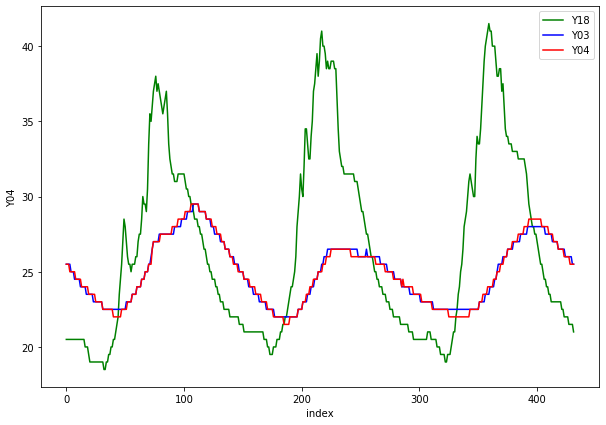

In [0]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data=target, x = 'index', y = 'Y18', color = 'green', ax=ax)
sns.lineplot(data=target, x = 'index', y = 'Y03', color = 'blue', ax=ax)
sns.lineplot(data=target, x = 'index', y = 'Y04', color = 'red', ax=ax)
plt.legend(['Y18','Y03','Y04'])
plt.show()

### Correlation이 높은 상관관계들에 대한 그림

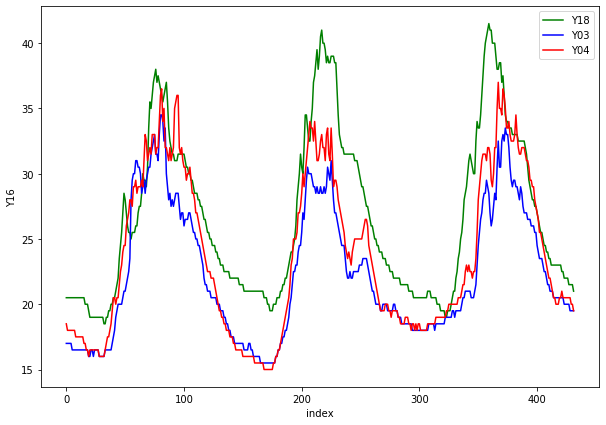

In [0]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(data=target, x = 'index', y = 'Y18', color = 'green', ax=ax)
sns.lineplot(data=target, x = 'index', y = 'Y15', color = 'blue', ax=ax)
sns.lineplot(data=target, x = 'index', y = 'Y16', color = 'red', ax=ax)
plt.legend(['Y18','Y03','Y04'])
plt.show()

## 결론
Y18이 실제로 예측해야 할 값이다. <br>
Y18은 (Y03, Y04)와 비교적 적은 상관관계를 가짐.